In [1]:
#belirli kütüphane importları
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
#veri seti yüklenmesi
ver_seti = pd.read_excel("car_data.xlsx")

In [3]:
ver_seti.head() #ilk 5 veri

,Yıl,Fiyat,Şanzıman,km,Vergi,Mil Başına Galon,Motor Hacmi
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
ver_seti.tail() #son 5 veri

,Yıl,Fiyat,Şanzıman,km,Vergi,Mil Başına Galon,Motor Hacmi
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0
13118,2019,54999,Automatic,2075,145,52.3,2.9


In [5]:
ver_seti.info() #veri seti hakkında temel bilgiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Yıl               13119 non-null  int64  
 1   Fiyat             13119 non-null  int64  
 2   Şanzıman          13119 non-null  object 
 3   km                13119 non-null  int64  
 4   Vergi             13119 non-null  int64  
 5   Mil Başına Galon  13119 non-null  float64
 6   Motor Hacmi       13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [6]:
ver_seti.describe() #temel istatistikleri

,Yıl,Fiyat,km,Vergi,Mil Başına Galon,Motor Hacmi
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
#isnull() fonksiyonu ile eksik veri kontrolü
eksik_veri_adedi = ver_seti.isnull().sum().sum()
if(eksik_veri_adedi == 0):
    print("eksik veri yoktur")
else:
    print("Eksik veri mevcut")

eksik veri yoktur


In [8]:
ver_seti.groupby("Şanzıman").count()

,Yıl,Fiyat,km,Vergi,Mil Başına Galon,Motor Hacmi
Şanzıman,,,,,,
Automatic,4825,4825,4825,4825,4825,4825
Manual,1444,1444,1444,1444,1444,1444
Other,2,2,2,2,2,2
Semi-Auto,6848,6848,6848,6848,6848,6848


In [9]:
idexler = ver_seti.groupby("Şanzıman").count().index
adetleri = ver_seti.groupby("Şanzıman").count()["Yıl"].values

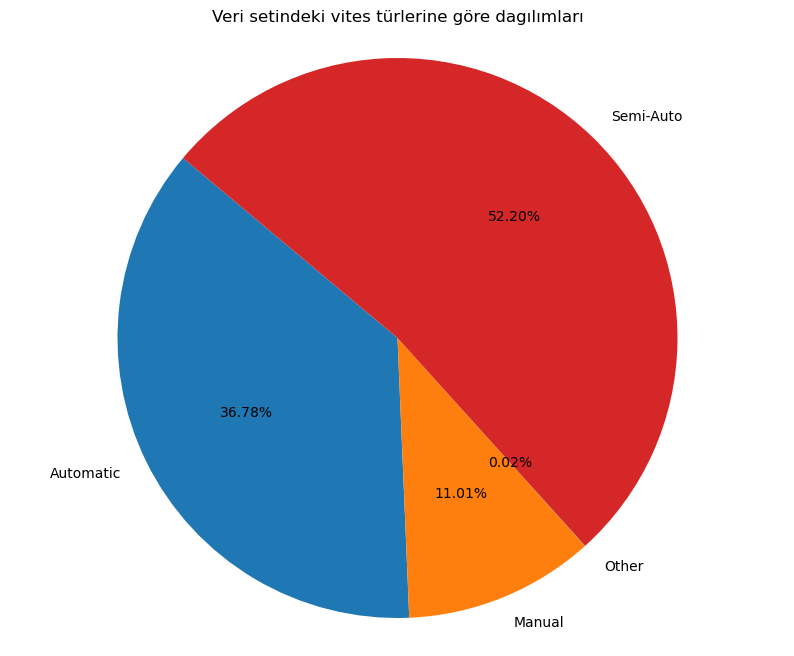

In [10]:
plt.figure(figsize=(10, 8))
plt.pie(adetleri, labels=idexler, autopct='%1.2f%%', startangle=140)
plt.title('Veri setindeki vites türlerine göre dagılımları')
plt.axis("equal") 
plt.show()

In [11]:
ver_seti["Aracin Yasi"] = 2024-ver_seti["Yıl"]
#current year olarak günümüz 2024 yılı baz alındı

In [12]:
ver_seti.head(3) #aracın üretim yılını günümüzden çıkararak araba yaşlarını çıkardım

,Yıl,Fiyat,Şanzıman,km,Vergi,Mil Başına Galon,Motor Hacmi,Aracin Yasi
0,2005,5200,Automatic,63000,325,32.1,1.8,19
1,2017,34948,Automatic,27000,20,61.4,2.1,7
2,2016,49948,Automatic,6200,555,28.0,5.5,8


In [13]:
ver_seti.groupby("Aracin Yasi").count()

,Yıl,Fiyat,Şanzıman,km,Vergi,Mil Başına Galon,Motor Hacmi
Aracin Yasi,,,,,,,
4,719,719,719,719,719,719,719
5,4553,4553,4553,4553,4553,4553,4553
6,1467,1467,1467,1467,1467,1467,1467
7,2381,2381,2381,2381,2381,2381,2381
8,1971,1971,1971,1971,1971,1971,1971
9,991,991,991,991,991,991,991
10,491,491,491,491,491,491,491
11,292,292,292,292,292,292,292
12,57,57,57,57,57,57,57


In [14]:
indexler = ver_seti.groupby("Aracin Yasi").count().index
degerler = ver_seti.groupby("Aracin Yasi").count()["Yıl"].values
toplam = sum(degerler[9:len(degerler)])
indexler = indexler[0:9]
degerler = degerler[0:9]
degerler = np.concatenate((degerler, [toplam]))
indexler = np.concatenate((indexler, ["Diğer"]))

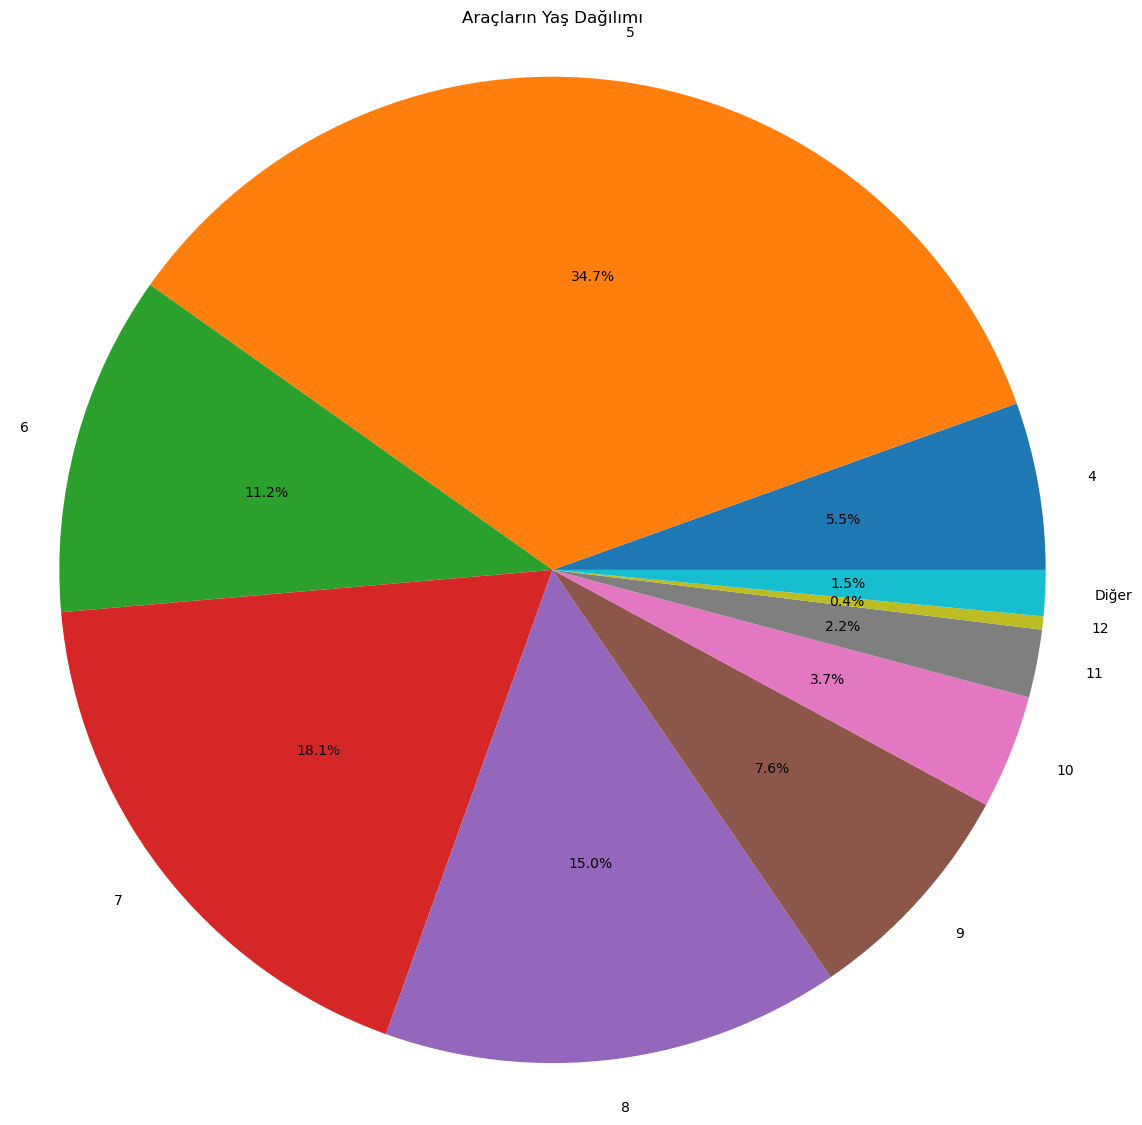

In [15]:
plt.figure(figsize=(14, 14))
plt.pie(degerler, labels=indexler, autopct='%1.1f%%')
plt.title('Araçların Yaş Dağılımı')
plt.axis('equal')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


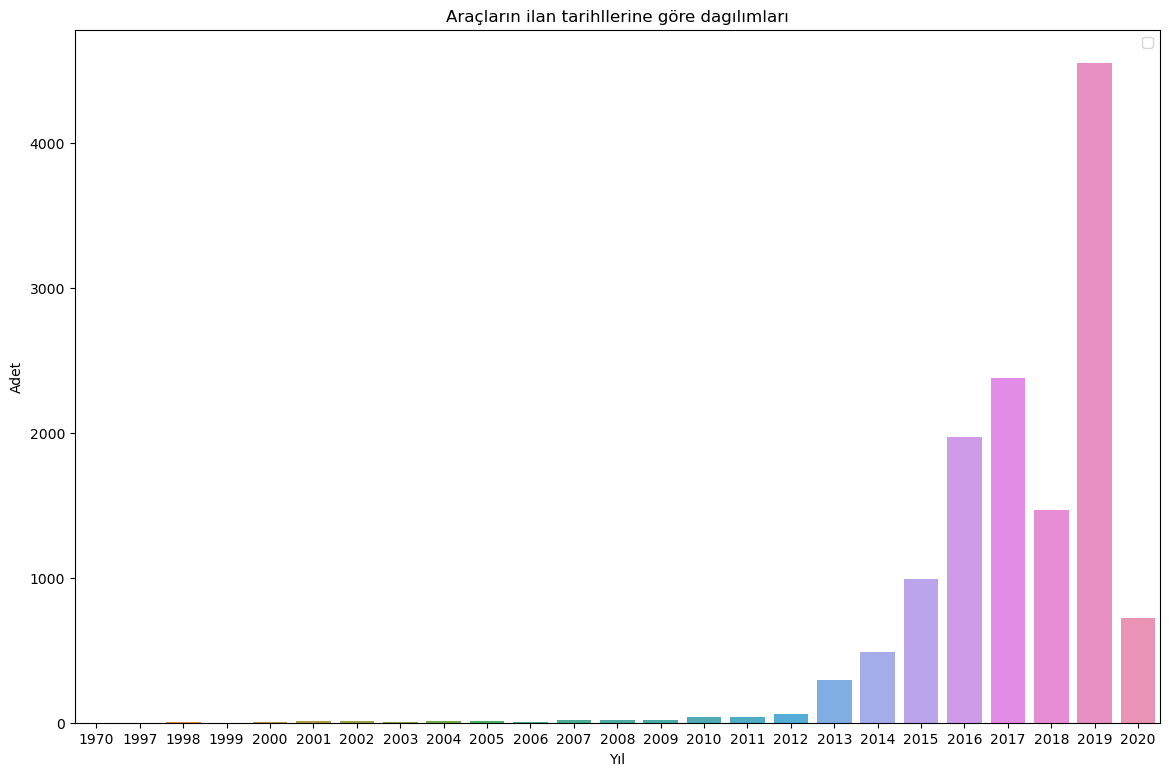

In [16]:
plt.figure(figsize=(14,9))
sbn.countplot(x ='Yıl', data = ver_seti)
plt.title("Araçların ilan tarihllerine göre dagılımları")
plt.ylabel("Adet")
plt.legend()

C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


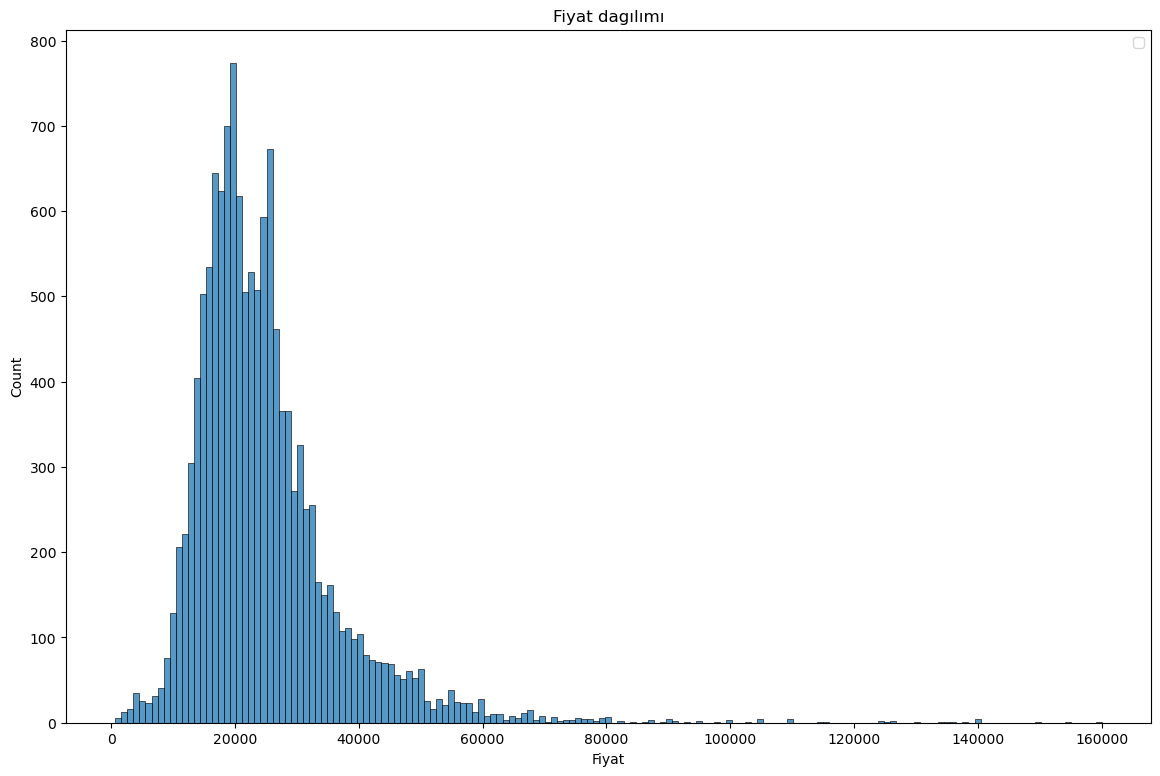

In [17]:
plt.figure(figsize=(14,9))
sbn.histplot(ver_seti["Fiyat"])
plt.title("Fiyat dagılımı")
plt.legend()

Text(0.5, 1.0, 'Fiyat ile km arasındaki ilişki')

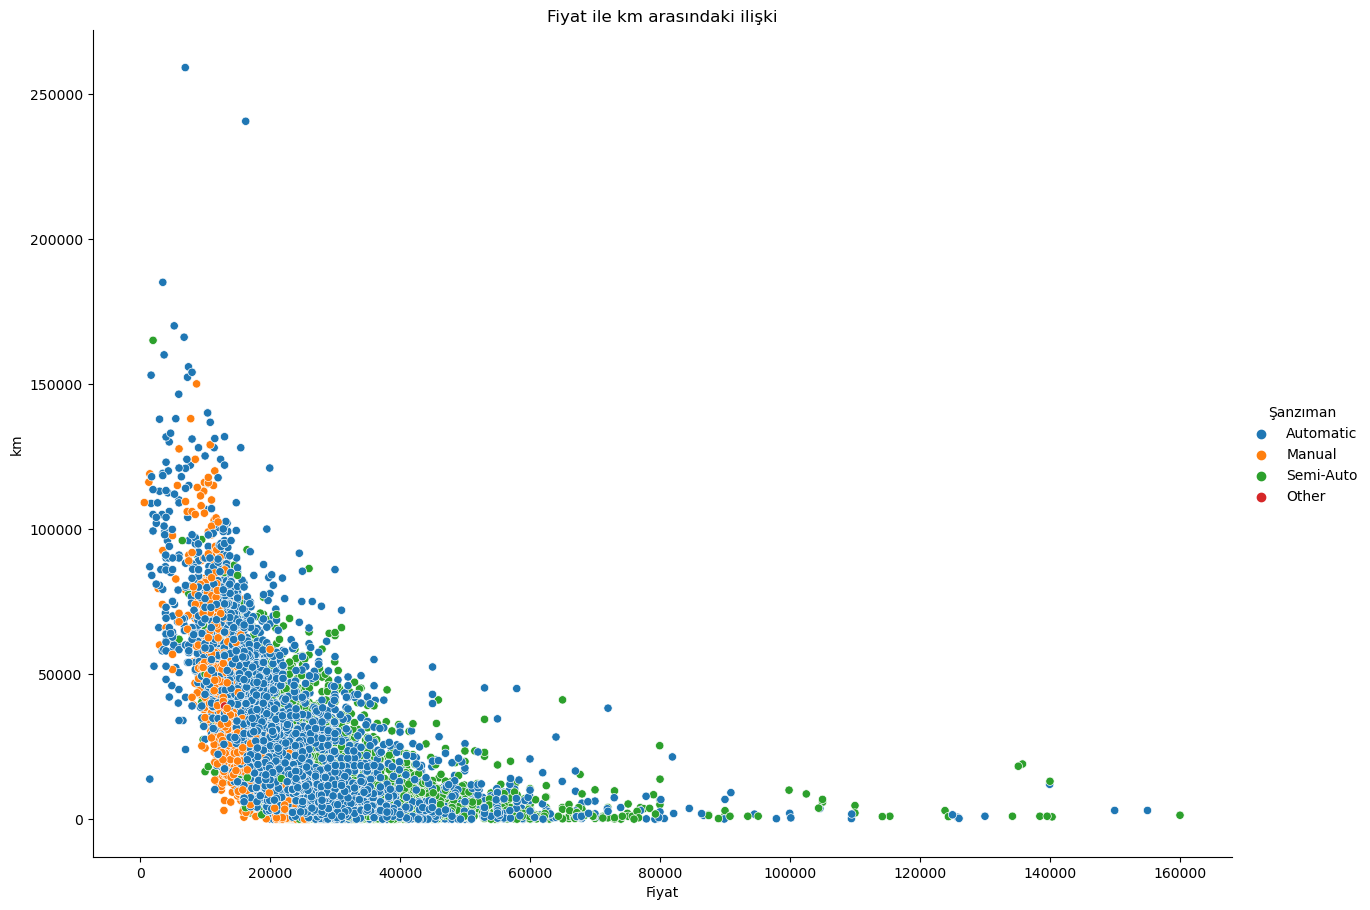

In [18]:
sbn.relplot(data=ver_seti,x="Fiyat",y="km",hue="Şanzıman",height=9, aspect=14/10)
plt.title("Fiyat ile km arasındaki ilişki")

C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kurt_\anaconda3\envs\tensorflowgp

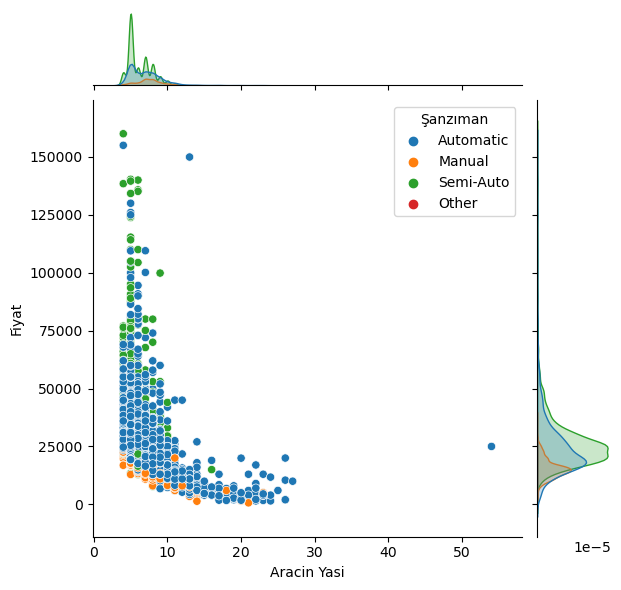

In [19]:
sbn.jointplot(data=ver_seti, x="Aracin Yasi", y="Fiyat", hue="Şanzıman")

<Axes: >

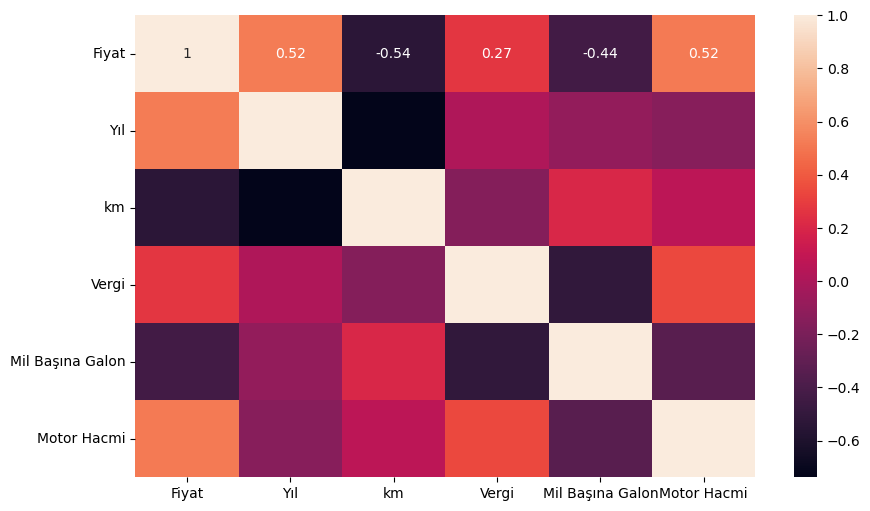

In [20]:
plt.figure(figsize=(10,6))
kolerasyon = ver_seti[["Fiyat","Yıl","km","Vergi","Mil Başına Galon","Motor Hacmi"]].corr()
sbn.heatmap(kolerasyon,annot=True)

C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na opti

<Axes: >

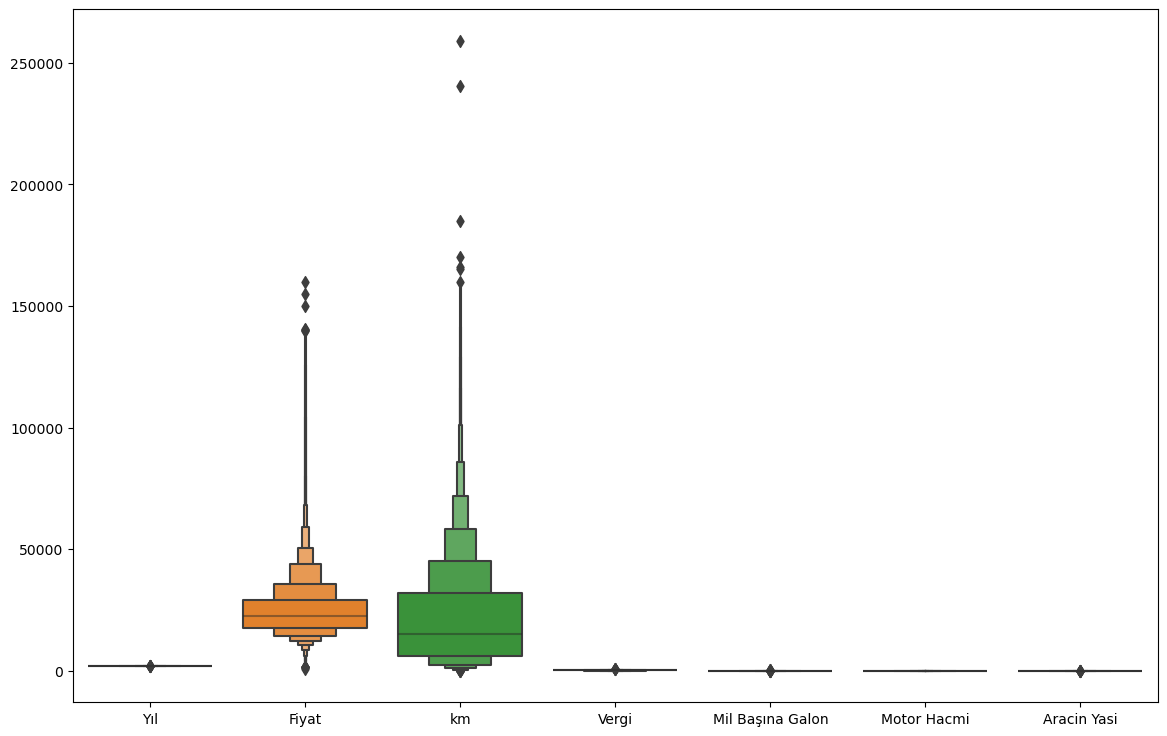

In [21]:
plt.figure(figsize=(14,9))
sbn.boxenplot(ver_seti)

In [22]:
def veri_seti_aykırı_deger_temizleme(isim):
    kontrol = ver_seti[isim]
    q1 = kontrol.quantile(0.25) #ilk çeyrek
    q3 = kontrol.quantile(0.75) #3. çeyrek
    IQR=q3-q1
    alt_sınır =q1-1.5*IQR
    üst_sınır =q3+1.5*IQR
    aykırı_min = kontrol<alt_sınır
    aykırı_min = kontrol[aykırı_min]
    aykırı_max = kontrol>üst_sınır
    aykırı_max = kontrol[aykırı_max]
    aykırı = pd.concat([aykırı_min,aykırı_max],axis=0)
    indexler = [i for i in aykırı.index]
    return indexler

In [23]:
#km degerinin aykırı verilerden arındırılması işlemi
silinecek_indexler = veri_seti_aykırı_deger_temizleme("km")

C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

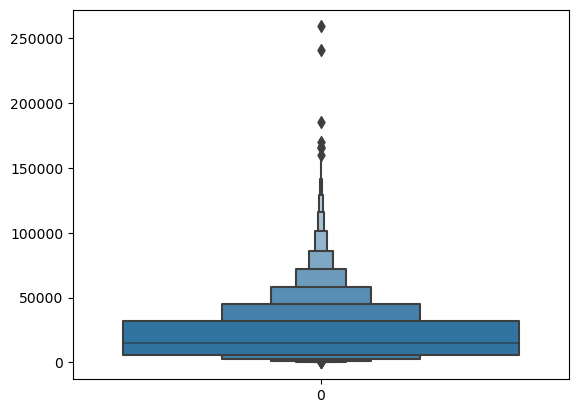

In [24]:
#silinmedenönceki hali
sbn.boxenplot(ver_seti["km"])

In [25]:
ver_seti = ver_seti.drop(silinecek_indexler,axis=0)

C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

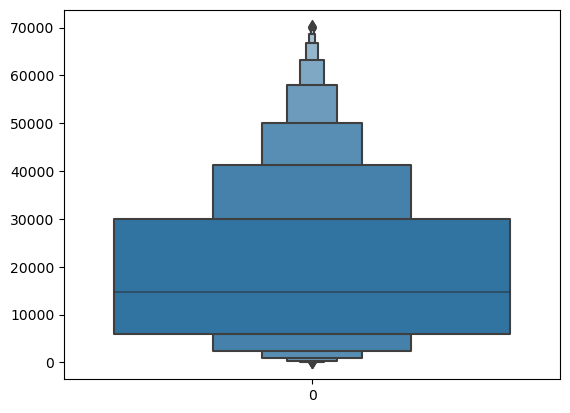

In [26]:
#aykırı verilerden arındırıldıktan sonraki dagılım
sbn.boxenplot(ver_seti["km"])

C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

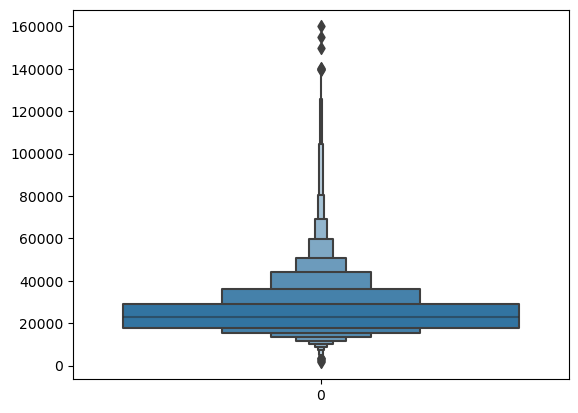

In [27]:
#silinmedenönceki hali
sbn.boxenplot(ver_seti["Fiyat"])

In [28]:
silinecek_indexler = veri_seti_aykırı_deger_temizleme("Fiyat")

In [29]:
ver_seti = ver_seti.drop(silinecek_indexler,axis=0)

C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

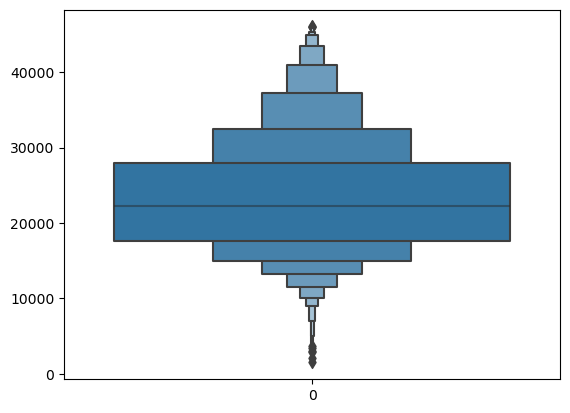

In [30]:
#aykırı verilerden arındırıldıktan sonraki dagılım
sbn.boxenplot(ver_seti["Fiyat"])

C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kurt_\anaconda3\envs\tensorflowgpuden\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na opti

<Axes: >

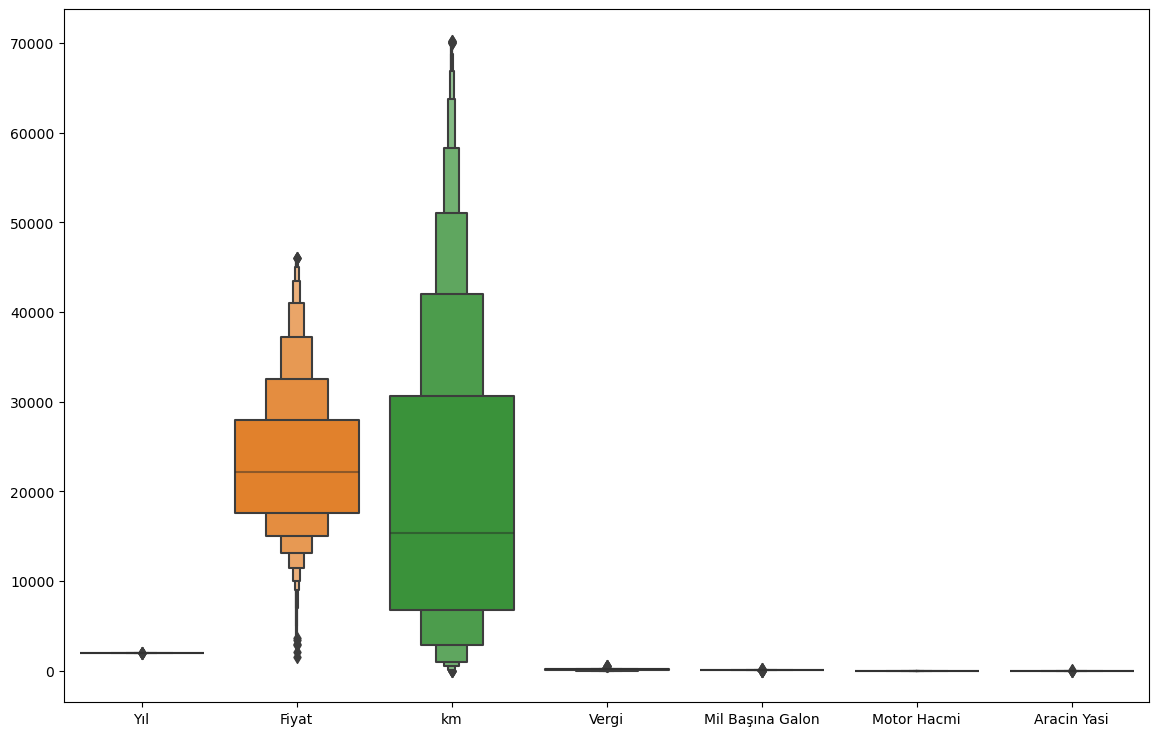

In [31]:
plt.figure(figsize=(14,9))
sbn.boxenplot(ver_seti) #temizlenmiş veri seti

In [32]:
ver_seti.head() #artık veri setimiz aykırı verilerden arındırılmış durumda

,Yıl,Fiyat,Şanzıman,km,Vergi,Mil Başına Galon,Motor Hacmi,Aracin Yasi
0,2005,5200,Automatic,63000,325,32.1,1.8,19
1,2017,34948,Automatic,27000,20,61.4,2.1,7
6,2018,30948,Automatic,16000,145,47.9,2.1,6
9,2017,19750,Automatic,15258,30,64.2,2.1,7
10,2020,32980,Automatic,606,145,35.8,2.0,4


In [33]:
set(ver_seti["Şanzıman"]) #şanzıman tipleri

{'Automatic', 'Manual', 'Other', 'Semi-Auto'}

In [34]:
#string degerlere model için sayılar atadım
sanzimanlar = {"Automatic": 1, "Manual": 2, "Semi-Auto": 3,"Other":4}
ver_seti["Şanzıman"] = ver_seti["Şanzıman"].map(sanzimanlar)

In [35]:
ver_seti.head()

,Yıl,Fiyat,Şanzıman,km,Vergi,Mil Başına Galon,Motor Hacmi,Aracin Yasi
0,2005,5200,1,63000,325,32.1,1.8,19
1,2017,34948,1,27000,20,61.4,2.1,7
6,2018,30948,1,16000,145,47.9,2.1,6
9,2017,19750,1,15258,30,64.2,2.1,7
10,2020,32980,1,606,145,35.8,2.0,4


In [36]:
y_degeri = ver_seti["Fiyat"].values
x_degerleri = ver_seti[["Yıl","Şanzıman","km","Vergi","Mil Başına Galon","Motor Hacmi"]].values #bağımsız değişkenler

In [37]:
y_degeri #fiyat bilgisi bulundururur bağımlı değişkendir

array([ 5200, 34948, 30948, ..., 24699, 30999, 37990], dtype=int64)

In [38]:
x_degerleri # fiyatı etkileyen diger degerler burda bulunuyor

array([[2.0050e+03, 1.0000e+00, 6.3000e+04, 3.2500e+02, 3.2100e+01,
        1.8000e+00],
       [2.0170e+03, 1.0000e+00, 2.7000e+04, 2.0000e+01, 6.1400e+01,
        2.1000e+00],
       [2.0180e+03, 1.0000e+00, 1.6000e+04, 1.4500e+02, 4.7900e+01,
        2.1000e+00],
       ...,
       [2.0200e+03, 1.0000e+00, 2.5000e+03, 1.4500e+02, 5.5400e+01,
        2.0000e+00],
       [2.0190e+03, 1.0000e+00, 1.1612e+04, 1.4500e+02, 4.1500e+01,
        2.1000e+00],
       [2.0190e+03, 1.0000e+00, 2.4260e+03, 1.4500e+02, 4.5600e+01,
        2.0000e+00]])

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_degerleri,y_degeri,test_size=0.3)
#train ve test değerlerinin atanması

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#şanzıman birimi için ölceklendirme fonksiyonu eklenmesi

In [41]:
x_train_scaled = scaler.fit_transform(x_train)

In [42]:
x_train_scaled #0-1 arasına aldık verileri

array([[0.92      , 0.        , 0.39968964, 0.03448276, 0.33857539,
        0.24193548],
       [0.92      , 0.66666667, 0.38398679, 0.05172414, 0.29879741,
        0.25806452],
       [0.86      , 0.        , 0.54794852, 0.25      , 0.25624422,
        0.33870968],
       ...,
       [0.98      , 0.66666667, 0.1016913 , 0.25      , 0.26179463,
        0.32258065],
       [0.9       , 0.66666667, 0.88243501, 0.03448276, 0.29185939,
        0.33870968],
       [0.98      , 0.66666667, 0.00728909, 0.25      , 0.20582794,
        0.32258065]])

In [43]:
x_test_scaled = scaler.transform(x_test)  

In [44]:
x_test_scaled#0-1 arasına aldık verileri

array([[0.98      , 0.33333333, 0.16520031, 0.25      , 0.12673451,
        0.20967742],
       [0.94      , 0.        , 0.39009425, 0.        , 0.34828862,
        0.24193548],
       [0.94      , 0.66666667, 0.39138977, 0.        , 0.35800185,
        0.33870968],
       ...,
       [0.92      , 0.33333333, 0.36451126, 0.03448276, 0.32978723,
        0.24193548],
       [0.98      , 0.        , 0.05879673, 0.25      , 0.25115634,
        0.32258065],
       [0.92      , 0.66666667, 0.11605592, 0.21551724, 0.25624422,
        0.33870968]])

In [45]:
# Regresyon modellerinin import edilmesi
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)
y_pred_lin = lin_reg.predict(x_test_scaled)

print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))
print("R^2 Score:", r2_score(y_test, y_pred_lin))
print()

Linear Regression
Mean Squared Error: 18072602.07304323
R^2 Score: 0.6909703104076941



In [47]:
# Decision Tree Regression
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(x_train_scaled, y_train)
y_pred_dec_tree = dec_tree_reg.predict(x_test_scaled)

print("Decision Tree Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dec_tree))
print("R^2 Score:", r2_score(y_test, y_pred_dec_tree))
print()

Decision Tree Regression
Mean Squared Error: 10505937.23715026
R^2 Score: 0.8203553362072066



In [48]:
# Random Forest Regression
rand_for_reg = RandomForestRegressor()
rand_for_reg.fit(x_train_scaled, y_train)
y_pred_rand_for = rand_for_reg.predict(x_test_scaled)

print("Random Forest Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rand_for))
print("R^2 Score:", r2_score(y_test, y_pred_rand_for))
print()

Random Forest Regression
Mean Squared Error: 6367297.781742571
R^2 Score: 0.8911233673446146



In [49]:
# K-Nearest Neighbors Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train_scaled, y_train)
y_pred_knn = knn_reg.predict(x_test_scaled)

print("K-Nearest Neighbors Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R^2 Score:", r2_score(y_test, y_pred_knn))
print()

K-Nearest Neighbors Regression
Mean Squared Error: 10140399.391988905
R^2 Score: 0.8266057945732957



In [50]:
# XGBoost Regression
xgb_reg = XGBRegressor(objective ='reg:squarederror')
xgb_reg.fit(x_train_scaled, y_train)
y_pred_xgb = xgb_reg.predict(x_test_scaled)

print("XGBoost Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
print("R^2 Score:", r2_score(y_test, y_pred_xgb))
print()

XGBoost Regression
Mean Squared Error: 5734085.218851997
R^2 Score: 0.9019508885264093



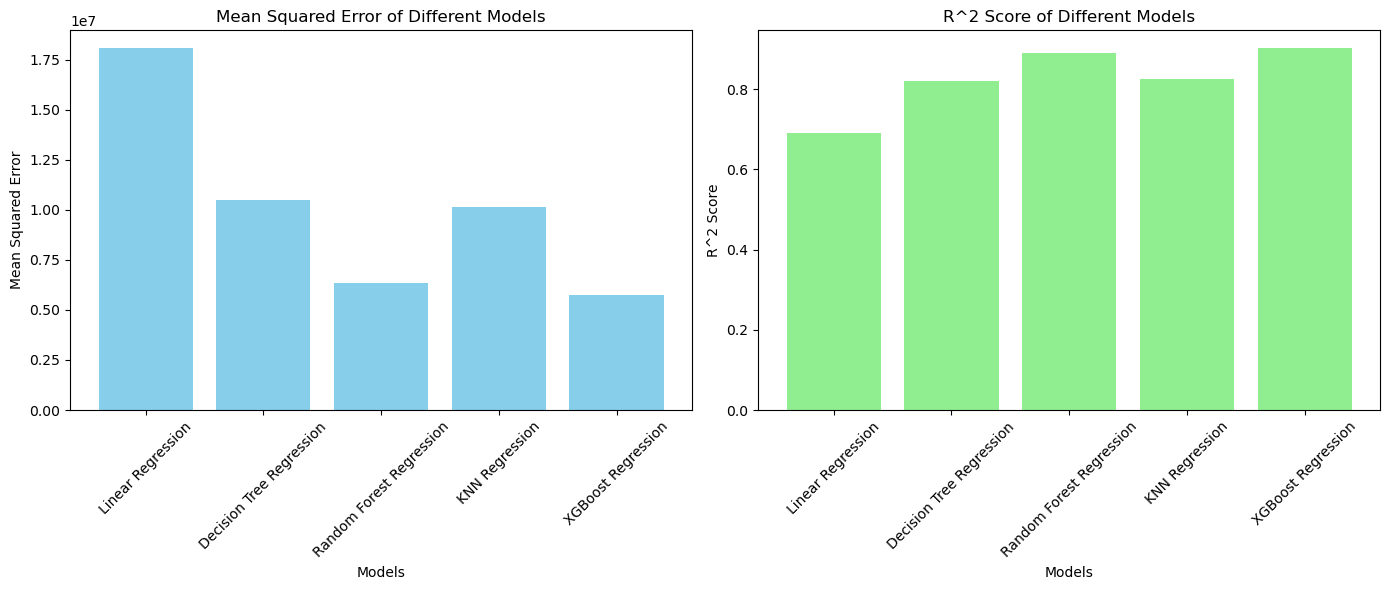

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# MSE ve R^2 skorlarını hesaplayalım
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'KNN Regression', 'XGBoost Regression']
mse_scores = [
    mean_squared_error(y_test, y_pred_lin),
    mean_squared_error(y_test, y_pred_dec_tree),
    mean_squared_error(y_test, y_pred_rand_for),
    mean_squared_error(y_test, y_pred_knn),
    mean_squared_error(y_test, y_pred_xgb)
]

r2_scores = [
    r2_score(y_test, y_pred_lin),
    r2_score(y_test, y_pred_dec_tree),
    r2_score(y_test, y_pred_rand_for),
    r2_score(y_test, y_pred_knn),
    r2_score(y_test, y_pred_xgb)
]

# MSE skorlarını plot edelim
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')
plt.xticks(rotation=45)

# R^2 skorlarını plot edelim
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score of Different Models')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [53]:
# En yüksek değere sahip olan modelin kaydedilmesi
import joblib
joblib.dump(xgb_reg, 'xgboost_model.pkl')
print("Model kaydedildi.")

Model kaydedildi.


In [54]:
joblib.dump(scaler, 'scaler.pkl')
print("Model ve scaler kaydedildi.")

Model ve scaler kaydedildi.
